In [2]:
from controller.camera import SpinnakerCamera
from camera_utils import record_background, change_in_image, binarize
import cucim.skimage.morphology as cskm
import time
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
gpu_enabled=True

In [3]:
background,_,_ = record_background(120,gpu_enabled=False)
background = cp.array(background)

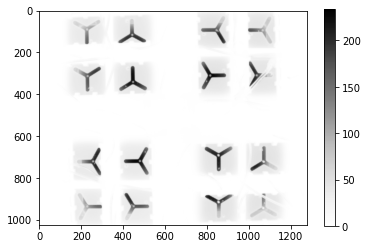

In [34]:
plt.imshow(background.get(),cmap='Greys')
plt.colorbar()

In [13]:
# x,y = cp.meshgrid(cp.linspace(-1,1,1024),cp.linspace(-1,1,1280))
# p = 1
# z = (cp.abs(x)**p + cp.abs(y)**p)
# z = z/z.max()
# plt.imshow(z.get())
# plt.colorbar()

In [68]:
with SpinnakerCamera(gpu_enabled=gpu_enabled, 
                     record_video=True, 
                     video_output_name="test", 
                     video_output_path='',) as cam:
    cam.start() # Start recording
    
    start = time.time()
    frames = np.zeros(100)
    for i in range(100):
        img1 = cam.get_array()
        frames[i] = time.time()-start
        # img1 = img1*z.T
        img1 = change_in_image(255-img1,255-background,gpu_enabled=gpu_enabled)
#         img1 = cskm.opening(img1,footprint=cskm.disk(1))
        img1 = binarize(img1,30,gpu_enabled=gpu_enabled)
        
    cam.stop() # Stop recording

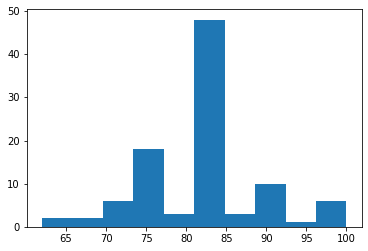

In [69]:
plt.hist(np.clip(1/np.diff(frames),0,100),bins=10)
plt.show()

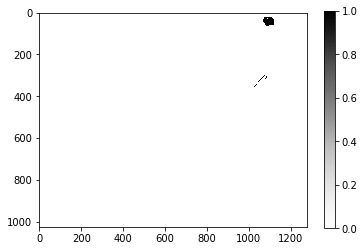

In [70]:
plt.imshow(img1.get(),cmap='Greys',interpolation='none')
plt.colorbar()

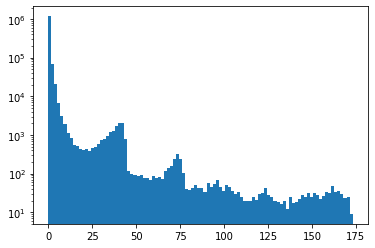

In [61]:
plt.hist(img1.get().flatten(),bins=100)
plt.gca().set_yscale('log')

In [ ]:
imgs = imgs.get()
dist = cp.sqrt(x**2+y**2).get()

In [ ]:
plt.scatter(dist.flatten()[imgs.flatten()>10],imgs.flatten()[imgs.flatten()>10],s=1,alpha=0.1)